# Лабораторная работа №6. Библиотека MatPlotLib

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

## Импорт датасета

Импортируйте полученный в результате выполнения 5-ой лабораторной датасет

In [182]:
df = pd.read_csv('out_df.csv')
df = df.drop('i', axis=1)
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


## Гистограммы распределений

1. Постройте гистограмму (распределения) значений по признаку `Engine_capacity(cm3)` 


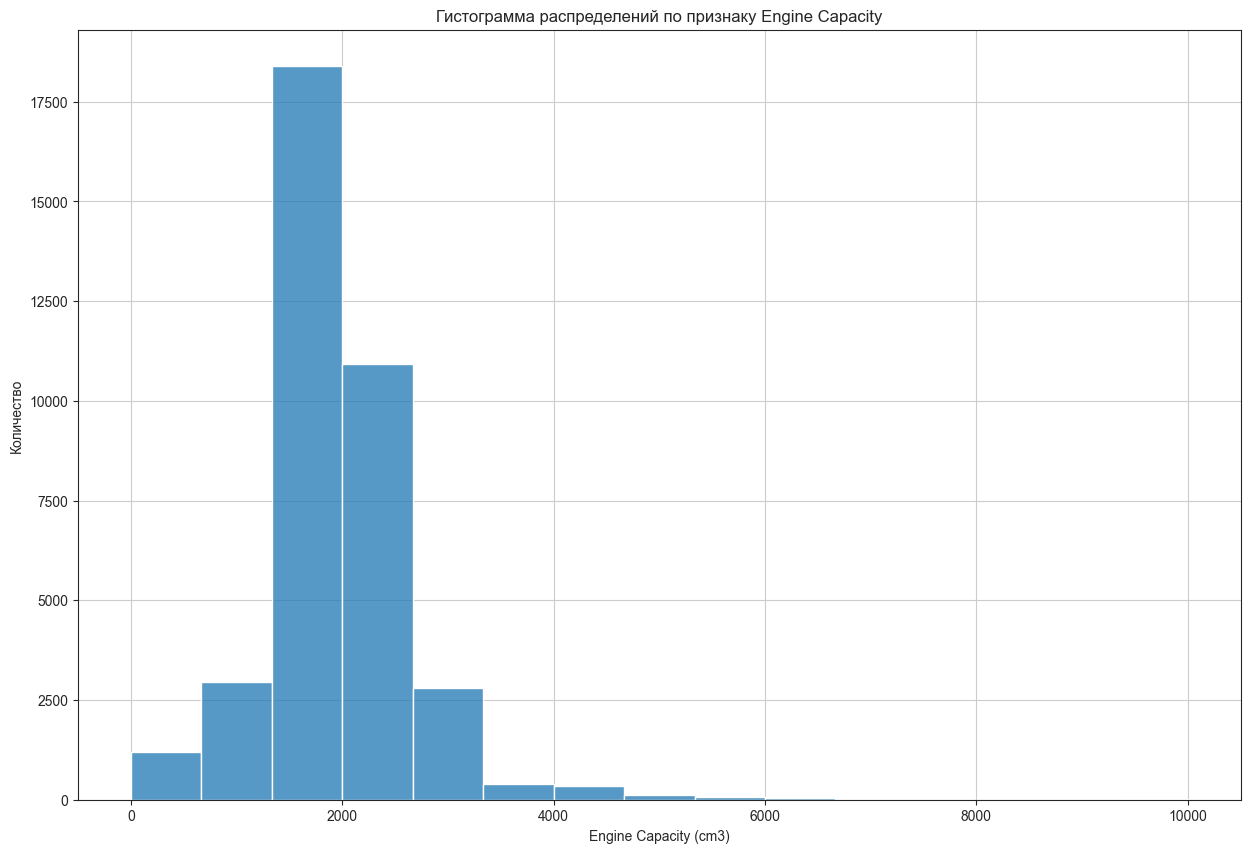

In [138]:
plt.figure(figsize=(15, 10)) 
sns.histplot(data=df, x="Engine_capacity(cm3)", bins=15) # бинс это количество интервалов, на которые будут разбиты значения
plt.title('Гистограмма распределений по признаку Engine Capacity') 
plt.xlabel('Engine Capacity (cm3)') 
plt.ylabel('Количество') 
plt.grid(True) 
plt.show() 

2. Постройте гистограммы (распределения) значений по каждому числовому признаку (столбцу)

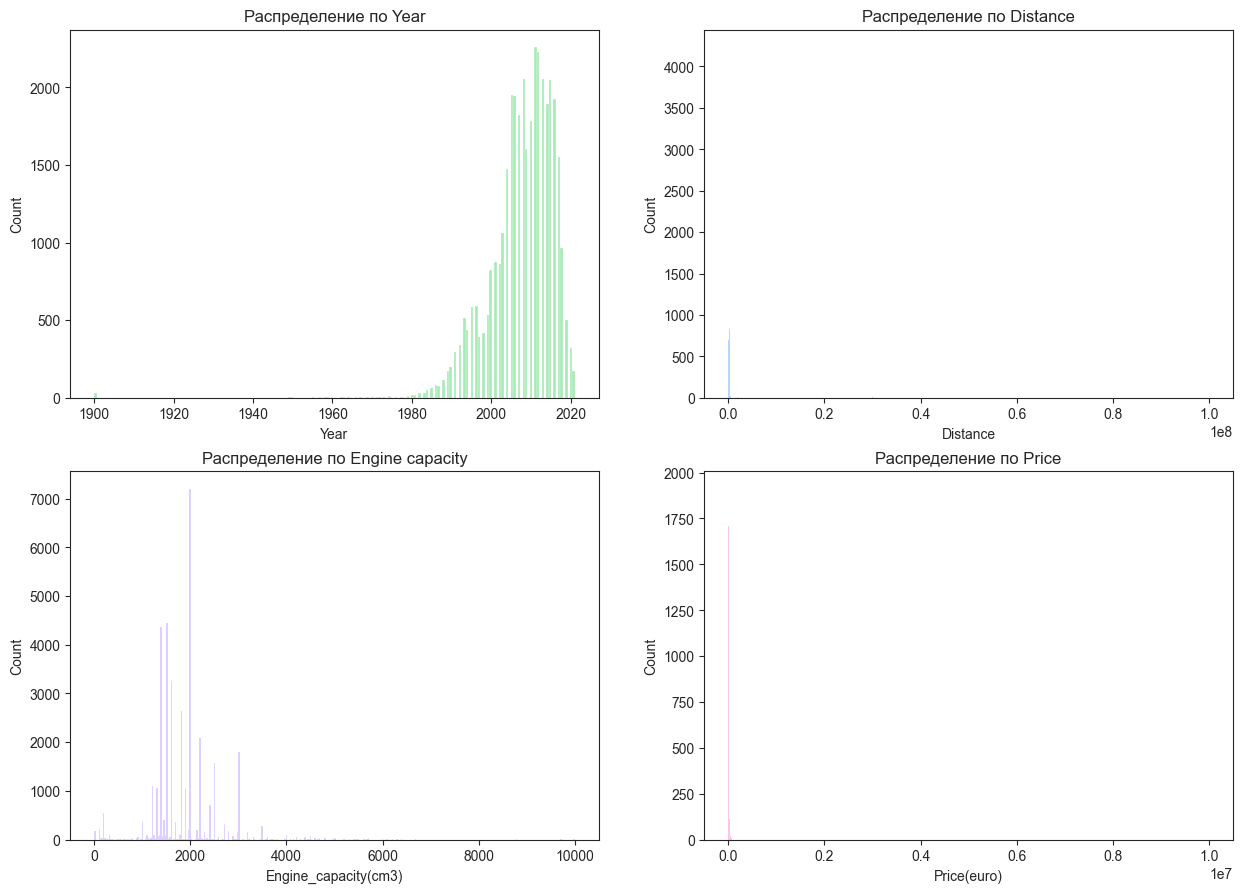

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 

sns.histplot(data=df, x="Year", color='#8DE5A1', ax=axs[0, 0]) 
axs[0, 0].set_title('Распределение по Year')

sns.histplot(data=df, x="Distance", color='#A1C9F4', ax=axs[0, 1]) 
axs[0, 1].set_title('Распределение по Distance')

sns.histplot(data=df, x="Engine_capacity(cm3)", color='#D0BBFF', ax=axs[1, 0]) 
axs[1, 0].set_title('Распределение по Engine capacity')

sns.histplot(data=df, x="Price(euro)", color='#FAB0E4', ax=axs[1, 1]) 
axs[1, 1].set_title('Распределение по Price')

plt.subplots_adjust(top=0.92)
plt.show() 


Столбцы `Distance` и `Price(euro)` имеют явные "выбросы", нужно посмотреть на них поближе.

3. Постройте гистограммы признаков `Distance` и `Price(euro)` в логарифмическом масштабе

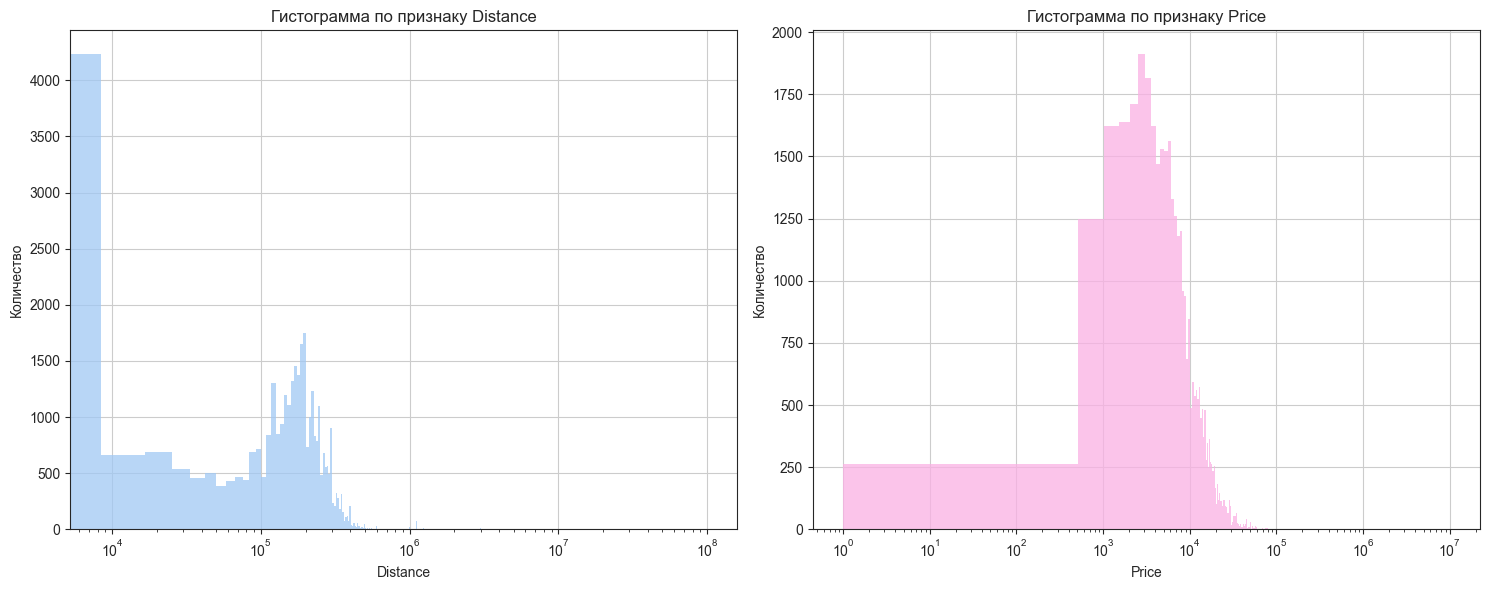

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df, x="Distance", color='#A1C9F4', ax=axs[0])

axs[0].set_xscale('log')
axs[0].set_title('Гистограмма по признаку Distance')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Количество')
axs[0].grid(True)

sns.histplot(data=df, x="Price(euro)", color='#FAB0E4', ax=axs[1])
axs[1].set_xscale('log')
axs[1].set_title('Гистограмма по признаку Price')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Количество')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы.

4. Удалите записи из датафрейма, у которых:

    1) Пробег (Distance) меньше 1100 и год (Year) меньше 2021 (одновременно)
    2) Пробег (Distance) больше 500000
    3) Год (Year) меньше 1971
    4) Объём двигателя (Engine_capacity(cm3)) меньше 200 (только для дизельных машин!), а также больше 5000
    5) Цена (Price(euro)) меньше 101, а также больше 50000

In [142]:
mask = (
    ((df['Distance'] < 1100) & (df['Year'] < 2021)) | 
    (df['Distance'] > 500000) |                       
    (df['Year'] < 1971) |                             
    (((df['Engine_capacity(cm3)'] < 200) & (df['Fuel_type'] == 'Diesel')) | (df['Engine_capacity(cm3)'] > 5000)) | 
    (df['Price(euro)'] < 101) | (df['Price(euro)'] > 50000)  
)

df_cleaned = df.drop(df[mask].index)

print(f"Количество строк в исходном датафрейме: {len(df)}")
print(f"Количество строк в новом датафрейме: {len(df_cleaned)}")

df_cleaned

Количество строк в исходном датафрейме: 37264
Количество строк в новом датафрейме: 32497


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
37258,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


5. Постройте гистограммы (распределения) значений по каждому числовому признаку после манипуляций с данными


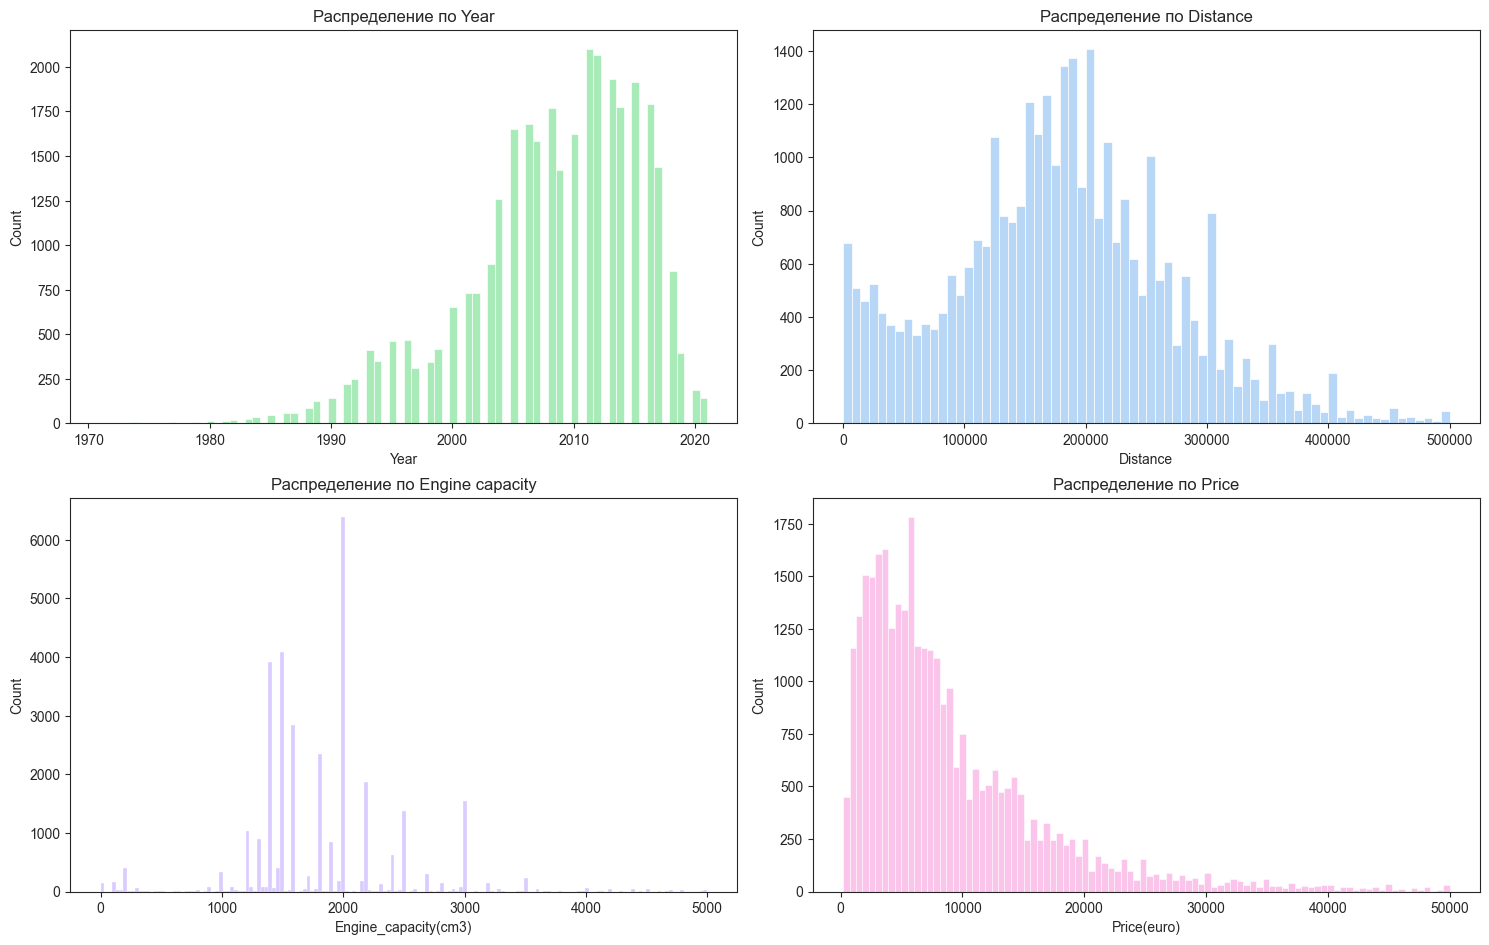

In [143]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 

sns.histplot(data=df_cleaned, x="Year", color='#8DE5A1', ax=axs[0, 0]) 
axs[0, 0].set_title('Распределение по Year')

sns.histplot(data=df_cleaned, x="Distance", color='#A1C9F4', ax=axs[0, 1]) 
axs[0, 1].set_title('Распределение по Distance')

sns.histplot(data=df_cleaned, x="Engine_capacity(cm3)", color='#D0BBFF', ax=axs[1, 0]) 
axs[1, 0].set_title('Распределение по Engine capacity')

sns.histplot(data=df_cleaned, x="Price(euro)", color='#FAB0E4', ax=axs[1, 1]) 
axs[1, 1].set_title('Распределение по Price')
# Настраиваем расстояние между подграфиками
plt.tight_layout()
# Добавляем дополнительное пространство сверху
plt.subplots_adjust(top=0.92)
plt.show() 

## Зависимости параметров друг от друга

6. Постройте графики зависимости параметров друг от друга

    Используйте метод seaborn `.pairplot(data, hue, palette)`

    Для подкраски данных используйте признак `Transmission`     

<Figure size 1500x1000 with 0 Axes>

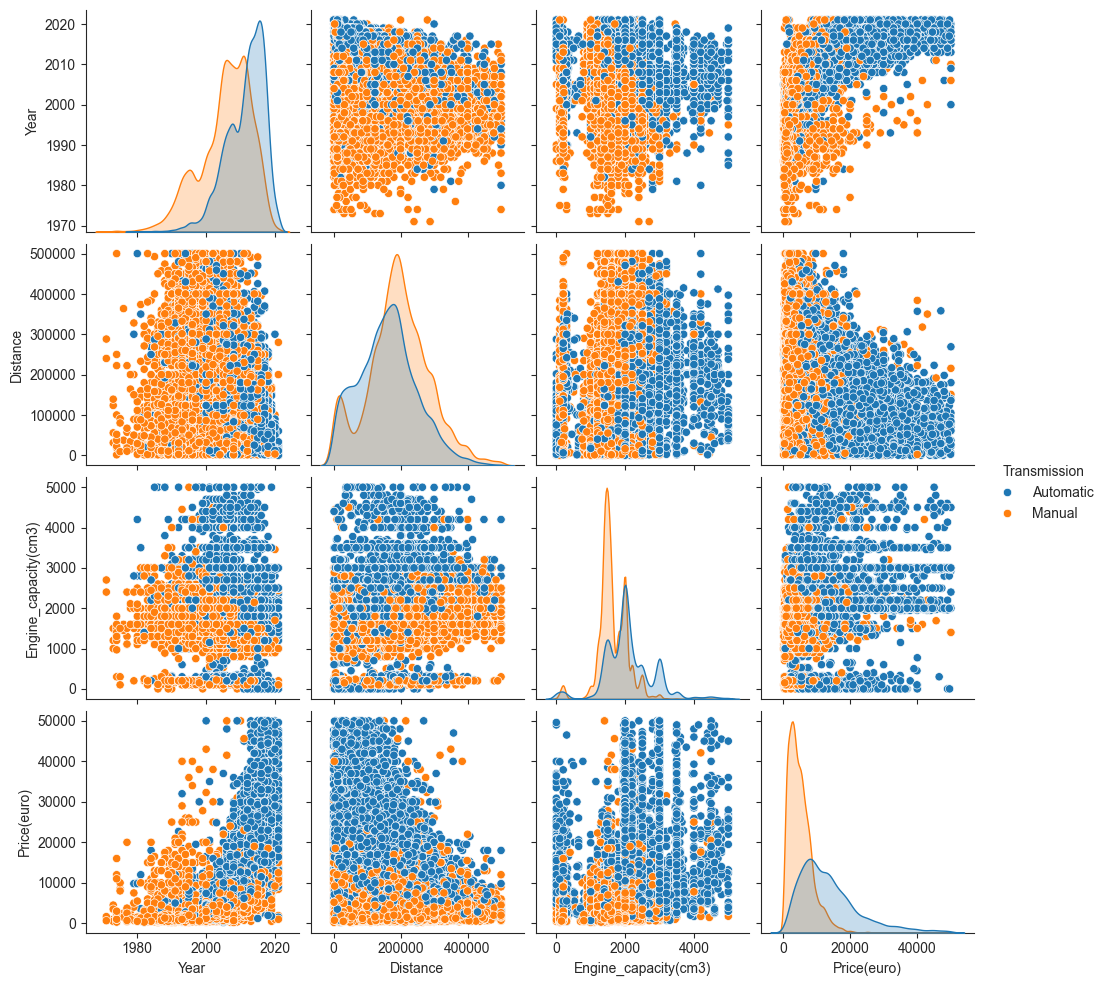

In [145]:
plt.figure(figsize=(15, 10)) 
sns.pairplot(data=df_cleaned, hue='Transmission')
plt.show() 

## Скатерограмма данных

7. Постройте скатерограмму для признаков `Price(euro)` и `Year`, выделив цветом тип трансмиссии (`Transmission`)

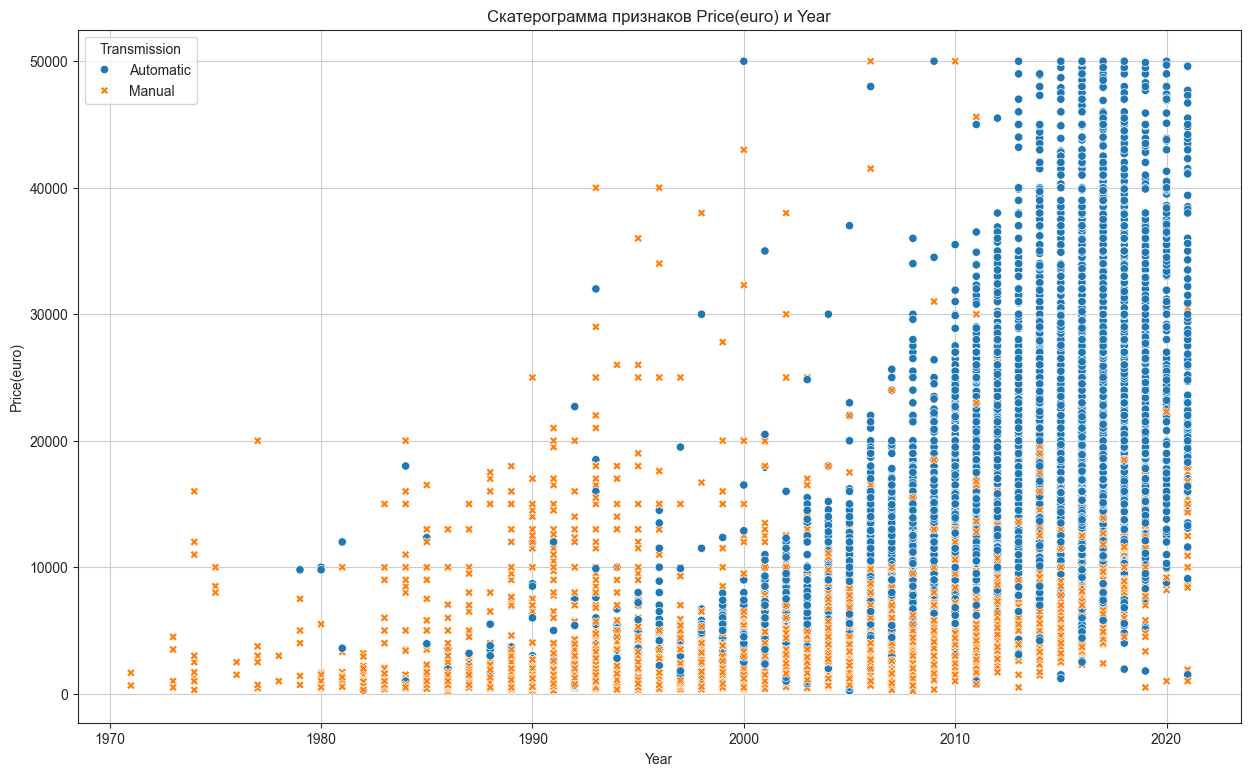

In [146]:
plt.figure(figsize=(15, 9)) 
sns.scatterplot(data=df_cleaned, x='Year', y='Price(euro)', hue='Transmission', style='Transmission')
plt.title('Скатерограмма признаков Price(euro) и Year') 
plt.grid(True) 
plt.show() 

## Violinplot

8. Постройте скрипичную диаграмму для оценки распределения цены (`Price(euro)`) для разных значений типа топлива (`Fuel_type`), выделив цветом тип трансмиссии (`Transmission`)

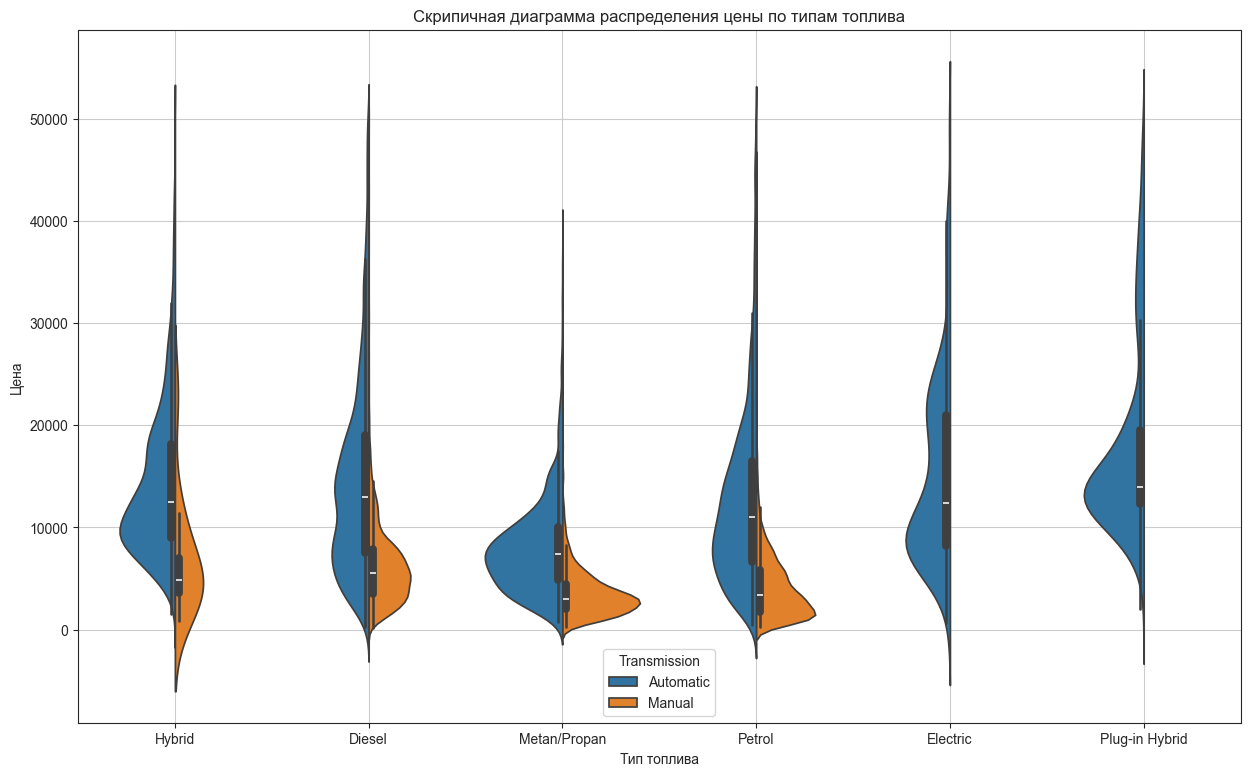

In [179]:
plt.figure(figsize=(15, 9))
sns.violinplot(data=df_cleaned, x='Fuel_type', y='Price(euro)', hue='Transmission', split = True)
plt.title('Скрипичная диаграмма распределения цены по типам топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Цена')
plt.grid()
plt.show()

## Boxplot

9. Постройте Boxplot для данных из предыдущего задания

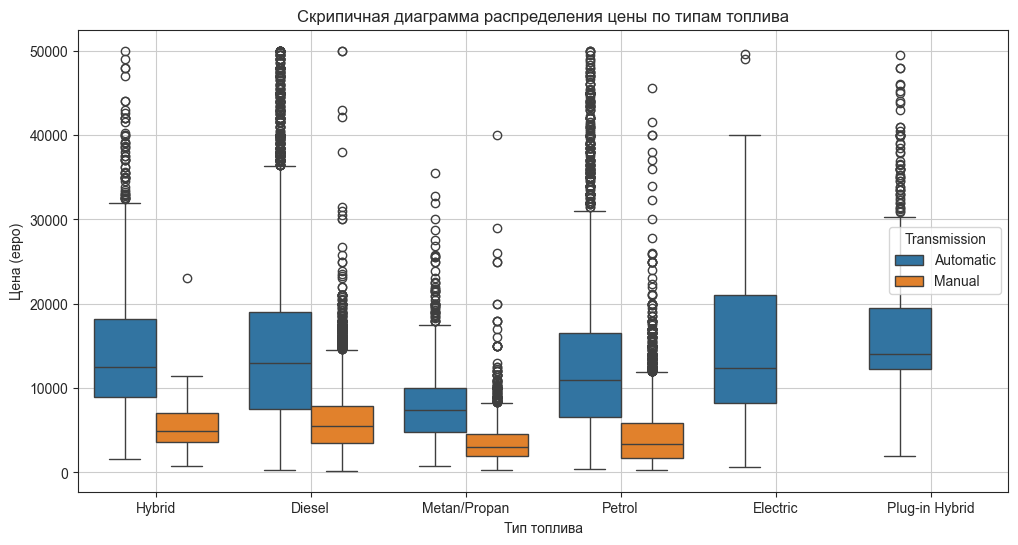

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Fuel_type', y='Price(euro)', hue='Transmission')
plt.title('Блочная диаграмма распределения цены по типам топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Цена (евро)')
plt.grid()
plt.show()

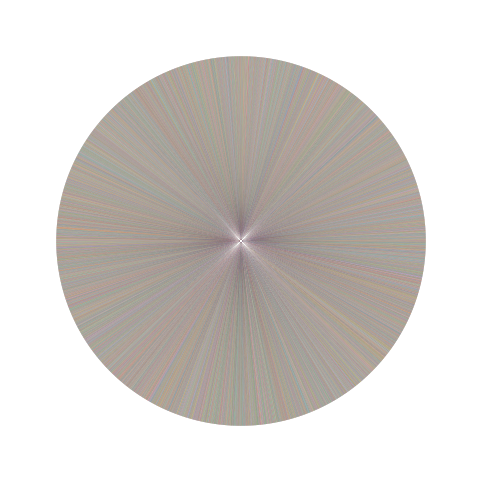

In [98]:
plt.figure(figsize=(12, 6))
plt.pie(df_cleaned['Price(euro)'])
plt.show()

In [129]:
import threading

def print_numbers(start, end):
    for i in range(start, end):
        print(i)

# Создание и запуск первого потока
thread1 = threading.Thread(target=print_numbers, args=(1, 6))
thread1.start()

# Создание и запуск второго потока
thread2 = threading.Thread(target=print_numbers, args=(6, 11))
thread2.start()

1
2
3
4
5
6
7
8
9
10


In [ ]:
import asyncio


async def ivan():
    print(" (1)  // Иван идет по дороге и тут светофор! надо подождать...")
    await asyncio.sleep(2)
    print(" (2) // Загорается зеленый свет для пешеходов и мы идем дальше")


async def car():
    print(" (3) // Машина начинает ехать")
    await asyncio.sleep(2)
    print(" (4) // Загорается красный для пешеходов и снова начинают ехать машины")


event_l = asyncio.get_event_loop()
tasks = [event_l.create_task(ivan()), event_l.create_task(car())]
wait_tasks = asyncio.wait(tasks)
# event_l.run_until_complete(wait_tasks)
# event_l.close()

C:\Users\vlkttlv\AppData\Local\Temp\ipykernel_23168\2599738792.py:18: RuntimeWarning: coroutine 'wait' was never awaited
  wait_tasks = asyncio.wait(tasks)


 (1)  // Иван идет по дороге и тут светофор! надо подождать...
 (3) // Машина начинает ехать
 (2) // Загорается зеленый свет для пешеходов и мы идем дальше
 (4) // Загорается красный для пешеходов и снова начинают ехать машины


In [158]:
a_set = {1, 2, 3}
b_iterator = iter(a_set)
print(item(b_iterator))
print(type(b_iterator))


NameError: name 'item' is not defined

In [178]:
def fibonacci(n):
    a, b = 0, 1
    while a <= n:
        yield a
        a, b = b, a + b

f = fibonacci(100)
f_list = list(f)
print(f_list)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
